### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
from collections import Counter
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

### Import dataset

In [2]:
# Import dataset
df = pd.read_csv("creditcard.csv")

### Exploratory data analysis

In [3]:
# view dimensions of the dataset

df.shape

(284807, 31)

We can see that there are 284807 instances and 31 attributes in the data set.

In [4]:
# preview the dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can see that there are no missing values in the dataset and the data is of the correct type

In [6]:
# statistical summary of the dataset

df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Types of variables

In [7]:
# Explore variables in the dataset

# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 0 categorical variables

The categorical variables are :

 []


As we can see, the dataset does not have any categorical variables

In [8]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 31 numerical variables

The numerical variables are : ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [9]:
# view the numerical variables

df[numerical].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Summary of numerical variables

(a) There are 6 numerical variables.

(b) All of the numerical variables are of float64 data type, with 30 of these variable being floats and only one variable being an integer.


In [10]:
# check missing values in numerical variables

df[numerical].isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that all the 31 numerical variables do not contain missing values.

### Declare feature vector and target variable

In [11]:
# declare feature vector and target variable

X = df.drop(['Class'], axis=1)

y = df['Class']

In [12]:
# let’s check the number of occurrences of each class label and plot the information using matplotlib.

non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


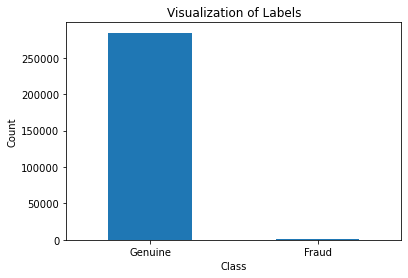

In [13]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

We can observe that the genuine transactions are over 99%! This is not good.

In [14]:
# Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.

scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount", "Time"], inplace= True, axis= 1)

### Data Visualization 

In [17]:
#List of all numeric columns
num = df.select_dtypes('number').columns.to_list()
num

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Class',
 'NormalizedAmount']

In [22]:
# numeric df
credit_num =  df[num]
credit_num

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


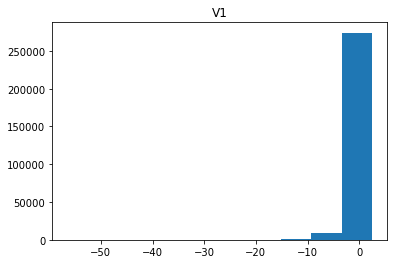

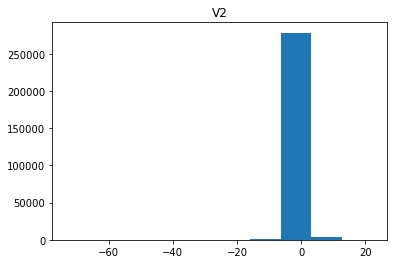

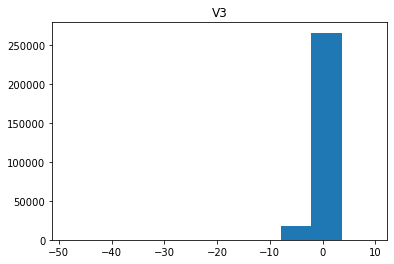

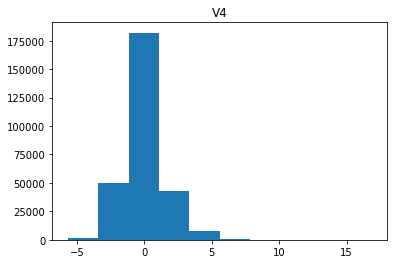

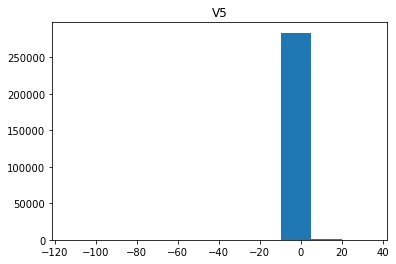

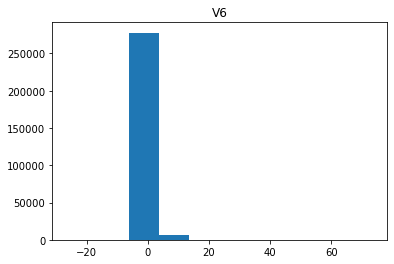

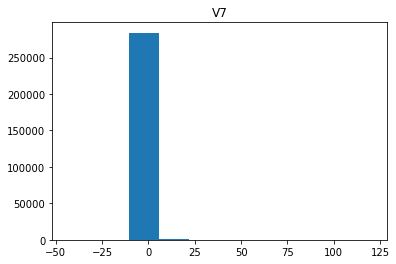

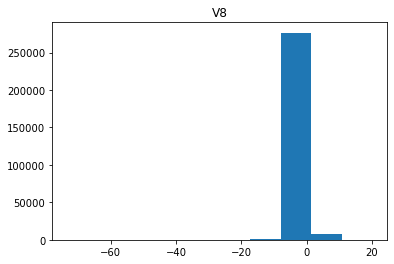

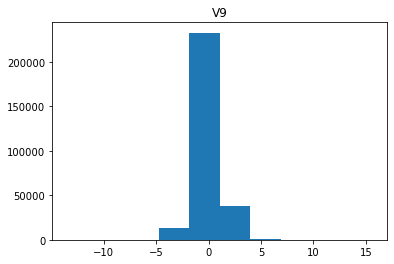

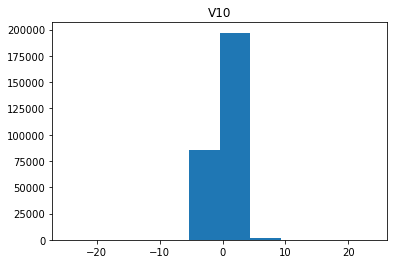

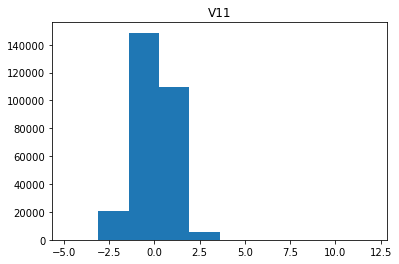

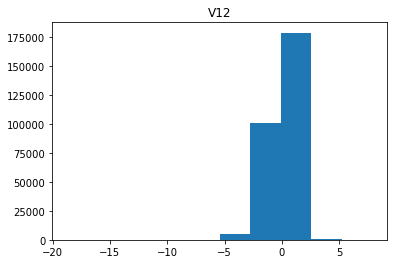

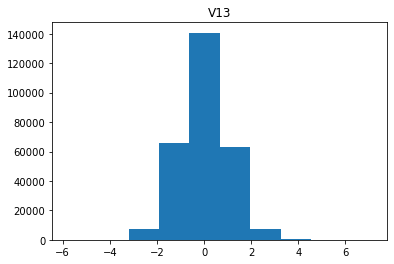

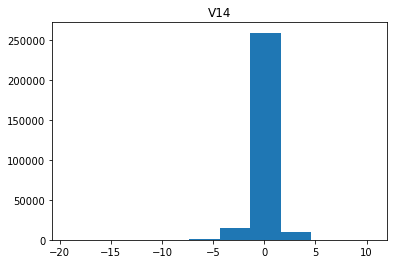

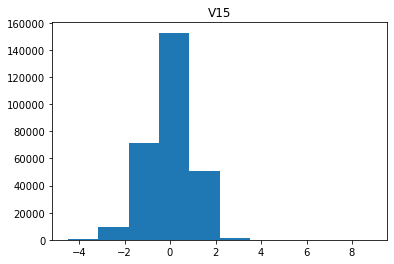

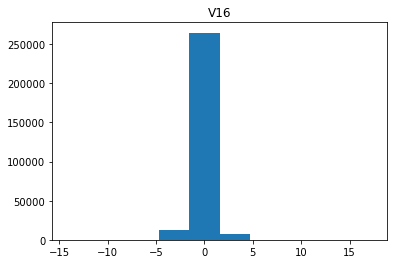

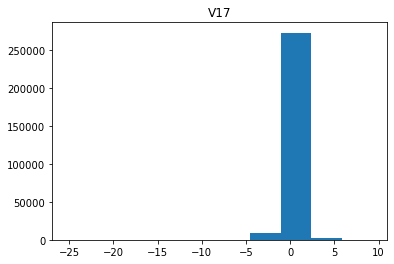

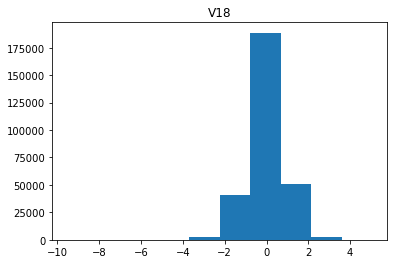

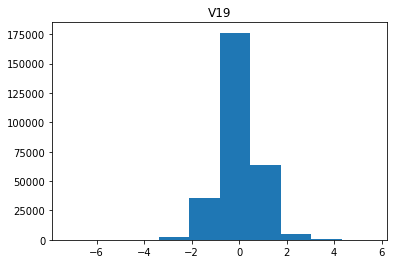

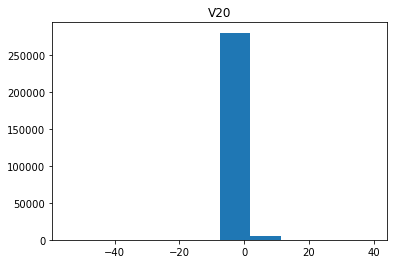

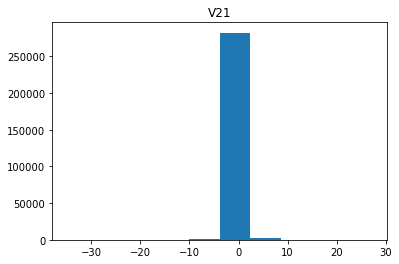

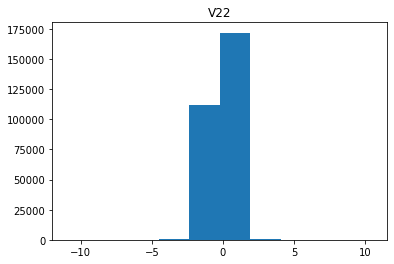

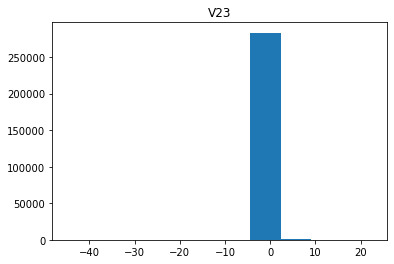

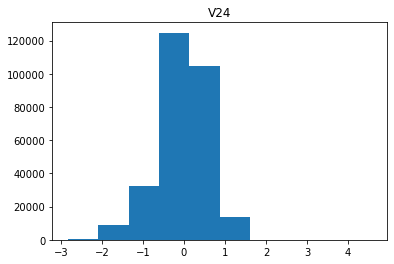

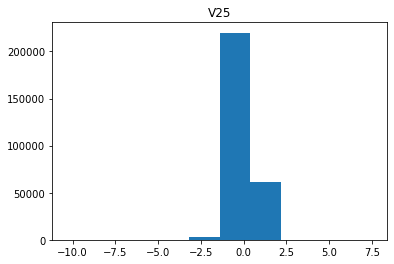

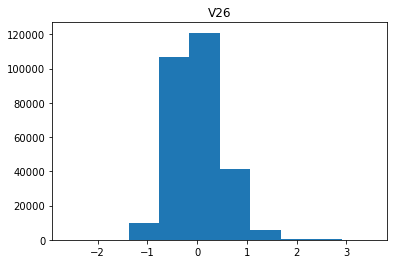

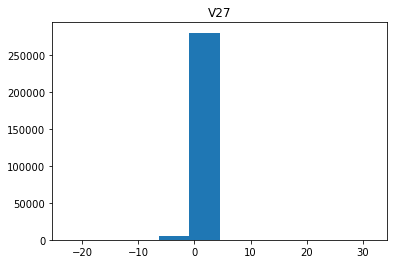

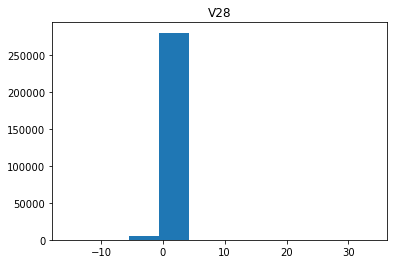

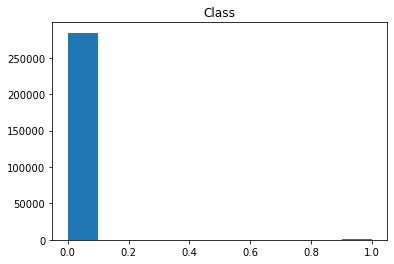

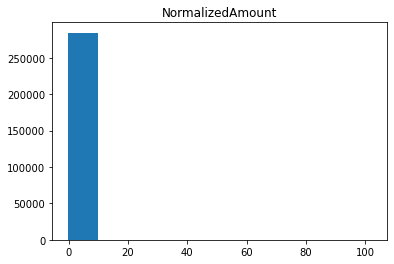

In [23]:
for col in credit_num:
    plt.hist(credit_num[col])
    plt.title(col)
    plt.show()


### Correlation matrix

<AxesSubplot:>

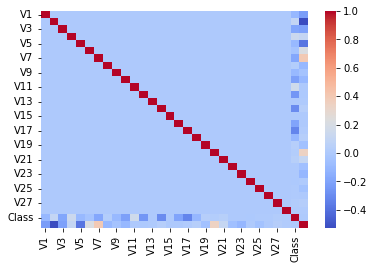

In [20]:
#plotting the correlation matrix
sns.heatmap(df.corr() ,cmap='coolwarm')

### Correlation table for a more detailed analysis:

In [21]:
#correlation table
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Musa Masango\AppData\Local\Temp\ipykernel_20368\2390052987.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
V1,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.10,-0.23
V2,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.09,-0.53
V3,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.19,-0.21
V4,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.13,0.10
V5,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.09,-0.39
V6,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,0.22
V7,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.19,0.40
V8,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.10
V9,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.10,-0.04
V10,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.22,-0.10


It is evident from the above correlation matrix that the column V11 has the highest correlation with the Class(a positive correlation of 0.15). Therefore our target variable (Class) is highly dependent on this column

### Split data into separate training and test set 

In [15]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [17]:
# check the shape of y_train and y_test

y_train.shape, y_test.shape

((199364,), (85443,))

### Feature engineering

In [18]:
# check data types in X_train

X_train.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [19]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [20]:
# check missing values in X_train

X_train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [21]:
# check missing values in X_test

X_test.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Addressing the Class-Imbalance issue

In [22]:
# Address the Class-Imbalance issue using the SMOTE technique
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of y: ", y_resampled.shape)
value_counts = Counter(y_resampled)
print(value_counts)
(X_train, X_test, y_train, y_test) = train_test_split(X_resampled, y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 30)
Resampled shape of y:  (568630,)
Counter({0: 284315, 1: 284315})


We can see that the data is now balanced

### Feature scaling

In [23]:
# We use feature scaling to ensure that that the values in the data are scaled equally
cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [24]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [25]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [26]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.390721,0.464020,-0.314458,0.214233,0.005756,0.275011,0.550895,0.211969,-0.024775,0.568209,...,-0.038146,-0.592246,-0.997760,-0.245451,-1.280096,0.604051,-0.775151,-0.024963,0.091826,0.826834
1,-0.245453,-0.036577,0.273659,-0.335779,0.472329,-0.981580,0.254865,-0.664949,0.074810,-0.466313,...,1.343209,-0.050342,0.066639,2.070317,-0.187870,-1.496638,-0.670859,0.762218,0.398306,1.866254
2,0.476795,-0.092292,-0.671105,0.283259,0.362502,1.449683,-0.131307,0.195921,-0.001338,-0.026166,...,0.303411,0.415367,0.819539,1.798333,0.869178,-2.398732,-0.652385,0.366159,1.356594,0.516513
3,0.847805,0.101997,-0.178690,0.576055,-0.228047,0.160620,0.860640,0.326204,0.069232,0.422931,...,0.123268,-0.000737,0.347942,0.286732,0.590621,-0.703945,-1.262124,0.290439,0.602596,0.672740
4,-0.086171,-0.045079,-0.482793,0.814603,0.094707,-0.141949,1.205459,0.094373,0.344101,0.688917,...,0.629976,-0.055624,0.495660,0.278928,0.189838,0.581437,-0.017982,0.017946,-0.051893,1.139145


We now have X_train dataset ready to be fed into the classifiers. This will be done in the following section

### Model training

In [27]:
# train a logistic regression classifier on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
LR = LogisticRegression(max_iter=100)


# fit the model
LR.fit(X_train, y_train)

# predict values using the test data
y_pred_1 = LR.predict(X_test)

#  prediction summary for the model
print(classification_report(y_test, y_pred_1))

# Accuracy score
LR_SC = accuracy_score(y_pred_1,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warn

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85149
           1       0.99      0.97      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

98.04% Accurate


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84419   730]
 [ 2608 82832]]

True Positives(TP) =  84419

True Negatives(TN) =  82832

False Positives(FP) =  730

False Negatives(FN) =  2608


<AxesSubplot:>

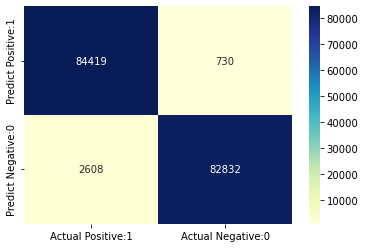

In [29]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [30]:
# train a  decision tree classifier on the training set
from sklearn.tree import DecisionTreeClassifier


# instantiate the model
DT = DecisionTreeClassifier()


# fit the model
DT.fit(X_train, y_train)

#predict values using the test data
y_pred_2 = DT.predict(X_test)

#  prediction Summary by model
print(classification_report(y_test, y_pred_2))

# Accuracy score
DT_SC = accuracy_score(y_pred_2,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

99.81% Accurate


In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_2)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84912   237]
 [   87 85353]]

True Positives(TP) =  84912

True Negatives(TN) =  85353

False Positives(FP) =  237

False Negatives(FN) =  87


<AxesSubplot:>

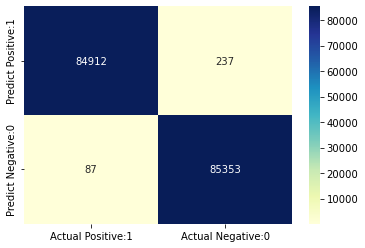

In [32]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [33]:
# train a random forest classifier on the training set
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
RF = RandomForestClassifier()


# fit the model
RF.fit(X_train, y_train)

# predict values using the test data
y_pred_3 = RF.predict(X_test)

#  prediction Summary by model
print(classification_report(y_test, y_pred_3))

# Accuracy score
RF_SC = accuracy_score(y_pred_3,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

99.99% Accurate


In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_3)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[85134    15]
 [    2 85438]]

True Positives(TP) =  85134

True Negatives(TN) =  85438

False Positives(FP) =  15

False Negatives(FN) =  2


<AxesSubplot:>

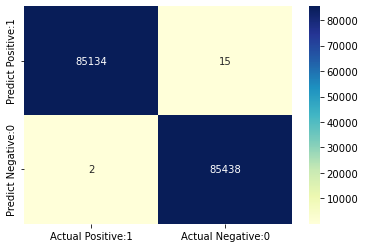

In [35]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [36]:
# train a KNN classifier on the training set
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
KNN = KNeighborsClassifier()


# fit the model
KNN.fit(X_train, y_train)

# predict values using the test data
y_pred_4 = KNN.predict(X_test)

#  prediction Summary by model
print(classification_report(y_test, y_pred_4))

# Accuracy score
KNN_SC = accuracy_score(y_pred_4,y_test)
print(f"{round(KNN_SC*100,2)}% Accurate")

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

99.84% Accurate


In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_4)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84884   265]
 [    0 85440]]

True Positives(TP) =  84884

True Negatives(TN) =  85440

False Positives(FP) =  265

False Negatives(FN) =  0


<AxesSubplot:>

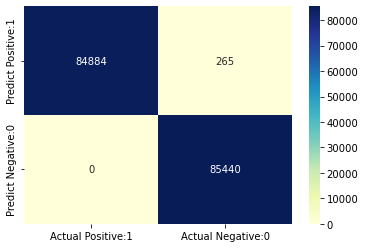

In [38]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [39]:
# train a Linear SVM classifier on the training set
from sklearn.svm import LinearSVC

# instantiate the model
LSVC = LinearSVC(C=1, max_iter=100)


# fit the model
LSVC.fit(X_train, y_train)
# predict values using the test data
y_pred_5 = LSVC.predict(X_test)

#  prediction Summary by model
print(classification_report(y_test, y_pred_5))

# Accuracy score
LSVC_SC = accuracy_score(y_pred_5,y_test)
print(f"{round(LSVC_SC*100,2)}% Accurate")

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85149
           1       0.99      0.96      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

97.58% Accurate


In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_5)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84172   977]
 [ 3153 82287]]

True Positives(TP) =  84172

True Negatives(TN) =  82287

False Positives(FP) =  977

False Negatives(FN) =  3153


<AxesSubplot:>

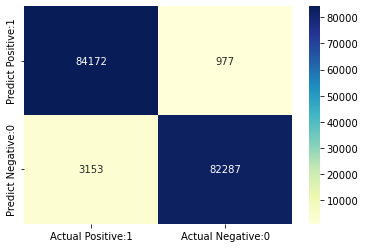

In [41]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [42]:
# train a GaussianNB classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
GNB = GaussianNB()


# fit the model
GNB.fit(X_train, y_train)
# predict values using the test data
y_pred_6 = GNB.predict(X_test)

#  prediction Summary by model
print(classification_report(y_test, y_pred_6))

# Accuracy score
GNB_SC = accuracy_score(y_pred_6,y_test)
print(f"{round(GNB_SC*100,2)}% Accurate")

C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Musa Masango\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.98      0.93     85149
           1       0.97      0.87      0.92     85440

    accuracy                           0.92    170589
   macro avg       0.93      0.92      0.92    170589
weighted avg       0.93      0.92      0.92    170589

92.34% Accurate


In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_6)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83183  1966]
 [11103 74337]]

True Positives(TP) =  83183

True Negatives(TN) =  74337

False Positives(FP) =  1966

False Negatives(FN) =  11103


<AxesSubplot:>

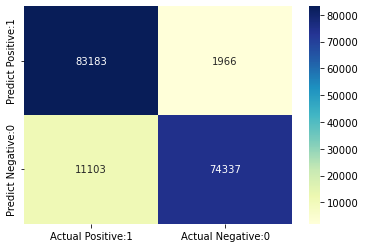

In [44]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [45]:
score = [LR_SC*100,DT_SC*100,RF_SC*100,KNN_SC*100,LSVC_SC*100,GNB_SC*100]
Models = pd.DataFrame({
    'Models': ["Logistic Regression","Decision Tree","Random Forest", "KNN", "Linear SVM", "Gaussian NB"],
    'Score': score})
Models.sort_values('Score', ascending=True)

,Models,Score
5,Gaussian NB,92.338896
4,Linear SVM,97.578976
0,Logistic Regression,98.043250
1,Decision Tree,99.810070
3,KNN,99.844656
2,Random Forest,99.990035


We can see that the best performing algorithm is the RandomForest with an accuracy score of 99%

### ROC Curve

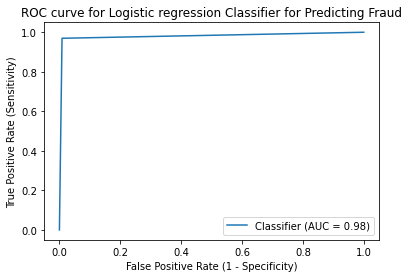

<Figure size 432x288 with 0 Axes>

In [46]:
# plot ROC Curve for the logistic regression classifier

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_1)

plt.title('ROC curve for Logistic regression Classifier for Predicting Fraud')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.figure(figsize=(6,4))

plt.show()

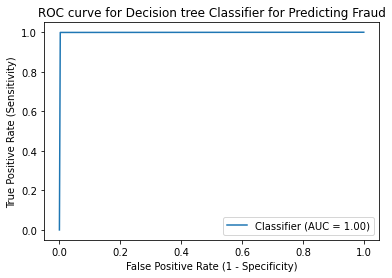

<Figure size 432x288 with 0 Axes>

In [47]:
# plot ROC Curve for the decision tree classifier

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_2)

plt.title('ROC curve for Decision tree Classifier for Predicting Fraud')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.figure(figsize=(6,4))

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

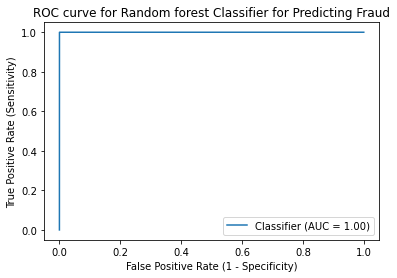

<Figure size 432x288 with 0 Axes>

In [48]:
# plot ROC Curve for the random forest classifier

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_3)

plt.title('ROC curve for Random forest Classifier for Predicting Fraud')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.figure(figsize=(6,4))

plt.show()

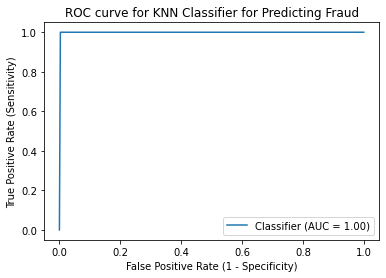

<Figure size 432x288 with 0 Axes>

In [49]:
# plot ROC Curve for the KNN classifier

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_4)

plt.title('ROC curve for KNN Classifier for Predicting Fraud')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.figure(figsize=(6,4))

plt.show()

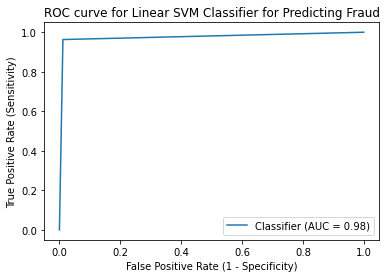

<Figure size 432x288 with 0 Axes>

In [50]:
# plot ROC Curve for the Linear SVM classifier

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_5)

plt.title('ROC curve for Linear SVM Classifier for Predicting Fraud')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.figure(figsize=(6,4))

plt.show()

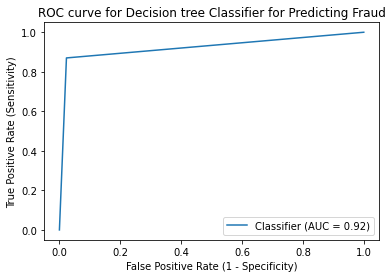

<Figure size 432x288 with 0 Axes>

In [51]:
# plot ROC Curve for the gaussian naive bayes classifier

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_6)

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Fraud')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.figure(figsize=(6,4))

plt.show()

Interpretation :
1. ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
2. OC AUC of our model approaches towards 1. So, we can conclude that our classifiers does a good job in predicting whether a transcation is genuine or fraudulent.